# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **sports or athletics**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **sports or athletics**?  For this category we are interested in sporting events or athletics broadly, please feel free to creatively interpret the category when building your research question!

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
!conda install html5lib -y
!conda install beautifulsoup4 -y
!conda install lxml -y
!conda install urllib2 -y

Fetching package metadata .........
Solving package specifications: ..........

# All requested packages already installed.
# packages in environment at /opt/conda:
#
html5lib                  0.999999999              py35_0    conda-forge
Fetching package metadata .........
Solving package specifications: ..........

# All requested packages already installed.
# packages in environment at /opt/conda:
#
beautifulsoup4            4.5.3                    py35_0    conda-forge
Fetching package metadata .........
Solving package specifications: ..........

# All requested packages already installed.
# packages in environment at /opt/conda:
#
lxml                      3.7.3                    py35_0    conda-forge
Fetching package metadata .........
Solving package specifications: .
Error: Package missing in current linux-64 channels: 
  - urllib2

Close matches found; did you mean one of these?

    urllib2: urllib3

You can search for packages on anaconda.org with

    anaconda search -t

In [2]:
import urllib
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd

soup =BeautifulSoup(urllib.request.urlopen('https://en.wikipedia.org/wiki/2008_Detroit_Lions_season').read())
table = soup.find_all("table", { "class" : "wikitable" })[2]
print(table)

/opt/conda/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file /opt/conda/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "html5lib")

  markup_type=markup_type))


<table align="center" class="wikitable" style="font-size: 100%;">
<tbody><tr>
<th rowspan="2">Week</th>
<th rowspan="2">Date</th>
<th rowspan="2">Kickoff</th>
<th rowspan="2">Opponent</th>
<th colspan="2">Results</th>
<th rowspan="2">Game Site</th>
<th rowspan="2">TV</th>
<th rowspan="2">NFL Recap</th>
</tr>
<tr>
<th>Final score</th>
<th>Team record</th>
</tr>
<tr>
<th align="center" style="background: #ffdddd;">1</th>
<td align="center" style="background: #ffdddd;">September 7, 2008</td>
<td align="center" style="background: #ffdddd;">1:00 PM <a class="mw-redirect" href="/wiki/North_American_Eastern_Time_Zone" title="North American Eastern Time Zone">EDT</a></td>
<td align="center" style="background: #ffdddd;">at <a href="/wiki/2008_Atlanta_Falcons_season" title="2008 Atlanta Falcons season">Atlanta Falcons</a></td>
<td align="center" style="background: #ffdddd;"><b>L</b> 21–34</td>
<td align="center" style="background: #ffdddd;">0–1</td>
<td align="center" style="background: #ffdddd;

In [3]:
n_columns = 0
n_rows=0
column_names = []
# Find number of rows and columns
# we also find the column titles if we can
for row in table.find_all('tr'):
    # Determine the number of rows in the table
    td_tags = row.find_all('td')
    if len(td_tags) > 0:
        n_rows+=1
        if n_columns == 0:
            # Set the number of columns for our table
            n_columns = len(td_tags)
                        
    # Handle column names if we find them
    th_tags = row.find_all('th') 
    if len(th_tags) > 0 and len(column_names) == 0:
        for th in th_tags:
            column_names.append(th.get_text())
                    
# Safeguard on Column Titles
if len(column_names) > 0 and len(column_names) != n_columns:
    raise Exception("Column titles do not match the number of columns")
    
columns = column_names if len(column_names) > 0 else range(0,n_columns)
lions08df = pd.DataFrame(columns = columns, index= range(0,n_rows))
row_marker = 0
for row in table.find_all('tr'):
    column_marker = 0
    columns = row.find_all('td')
    for column in columns:
        lions08df.iat[row_marker,column_marker] = column.get_text()
        column_marker += 1
    if len(columns) > 0:
        row_marker += 1

In [4]:
lions08df

,Week,Date,Kickoff,Opponent,Results,Game Site,TV,NFL Recap
0,"September 7, 2008",1:00 PM EDT,at Atlanta Falcons,L 21–34,0–1,Georgia Dome,FOX,Recap
1,"September 14, 2008",1:00 PM EDT,Green Bay Packers,L 25–48,0–2,Ford Field,FOX,Recap
2,"September 21, 2008",4:05 PM EDT,at San Francisco 49ers,L 13–31,0–3,Candlestick Park,FOX,Recap
3,Bye,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"October 5, 2008",1:00 PM EDT,Chicago Bears,L 7–34,0–4,Ford Field,FOX,Recap
5,"October 12, 2008",1:00 PM EDT,at Minnesota Vikings,L 10–12,0–5,Hubert H. Humphrey Metrodome,FOX,Recap
6,"October 19, 2008",4:05 PM EDT,at Houston Texans,L 21–28,0–6,Reliant Stadium,FOX,Recap
7,"October 26, 2008",1:00 PM EDT,Washington Redskins,L 17–25,0–7,Ford Field,FOX x,Recap
8,"November 2, 2008",1:00 PM EST,at Chicago Bears,L 23–27,0–8,Soldier Field,FOX,Recap
9,"November 9, 2008",1:00 PM EST,Jacksonville Jaguars,L 14–38,0–9,Ford Field,CBS x,Recap


In [5]:
soup =BeautifulSoup(urllib.request.urlopen('https://en.wikipedia.org/wiki/2009_St._Louis_Rams_season').read())
table = soup.find_all("table", { "class" : "wikitable" })[1]
print(table)

/opt/conda/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file /opt/conda/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "html5lib")

  markup_type=markup_type))


<table align="center" class="wikitable" style="font-size: 95%;">
<tbody><tr>
<th rowspan="2">Week</th>
<th rowspan="2">Date</th>
<th rowspan="2">Kickoff (<a class="mw-redirect" href="/wiki/Central_Time_Zone_(Americas)" title="Central Time Zone (Americas)">CT</a>)</th>
<th rowspan="2">Opponent</th>
<th colspan="2">Results</th>
<th rowspan="2">Game Site</th>
<th rowspan="2">TV</th>
<th rowspan="2">NFL Recap</th>
</tr>
<tr>
<th>Final score</th>
<th>Team record</th>
</tr>
<tr style="background: #ffdddd;">
<th align="center">1</th>
<td align="center">September 13</td>
<td align="center">3:15 PM</td>
<td align="center">at <b><a href="/wiki/2009_Seattle_Seahawks_season" title="2009 Seattle Seahawks season">Seattle Seahawks</a></b></td>
<td align="center"><b>L</b> 0–28</td>
<td align="center">0–1</td>
<td align="center"><a class="mw-redirect" href="/wiki/Qwest_Field" title="Qwest Field">Qwest Field</a></td>
<td align="center"><a href="/wiki/Fox_Broadcasting_Company" title="Fox Broadcasting Com

In [6]:
n_columns = 0
n_rows=0
column_names = []
# Find number of rows and columns
# we also find the column titles if we can
for row in table.find_all('tr'):
    # Determine the number of rows in the table
    td_tags = row.find_all('td')
    if len(td_tags) > 0:
        n_rows+=1
        if n_columns == 0:
            # Set the number of columns for our table
            n_columns = len(td_tags)
                        
    # Handle column names if we find them
    th_tags = row.find_all('th') 
    if len(th_tags) > 0 and len(column_names) == 0:
        for th in th_tags:
            column_names.append(th.get_text())
                    
# Safeguard on Column Titles
if len(column_names) > 0 and len(column_names) != n_columns:
    raise Exception("Column titles do not match the number of columns")
    
columns = column_names if len(column_names) > 0 else range(0,n_columns)
Rams09df = pd.DataFrame(columns = columns, index= range(0,n_rows))
row_marker = 0
for row in table.find_all('tr'):
    column_marker = 0
    columns = row.find_all('td')
    for column in columns:
        Rams09df.iat[row_marker,column_marker] = column.get_text()
        column_marker += 1
    if len(columns) > 0:
        row_marker += 1

In [7]:
Rams09df

,Week,Date,Kickoff (CT),Opponent,Results,Game Site,TV,NFL Recap
0,September 13,3:15 PM,at Seattle Seahawks,L 0–28,0–1,Qwest Field,Fox,Recap
1,September 20,12:00 PM,at Washington Redskins,L 7–9,0–2,FedExField,Fox,Recap
2,September 27,12:00 PM,Green Bay Packers,L 17–36,0–3,Edward Jones Dome,Fox,Recap
3,October 4,3:15 PM,at San Francisco 49ers,L 0–35,0–4,Candlestick Park,Fox,Recap
4,October 11,12:00 PM,Minnesota Vikings,L 10–38,0–5,Edward Jones Dome,Fox,Recap
5,October 18,12:00 PM,at Jacksonville Jaguars,L 20–23 (OT),0–6,Jacksonville Municipal Stadium,Fox,Recap
6,October 25,12:00 PM,Indianapolis Colts,L 6–42,0–7,Edward Jones Dome,CBS,Recap
7,November 1,12:00 PM,at Detroit Lions,W 17–10,1–7,Ford Field,Fox,Recap
8,Bye,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,November 15,12:00 PM,New Orleans Saints,L 23–28,1–8,Edward Jones Dome,Fox,Recap


In [8]:
soup =BeautifulSoup(urllib.request.urlopen('https://en.wikipedia.org/wiki/2000_San_Diego_Chargers_season').read())
table = soup.find_all("table", { "class" : "wikitable" })[0]
print(table)

/opt/conda/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file /opt/conda/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "html5lib")

  markup_type=markup_type))


<table class="wikitable">
<tbody><tr>
<th>Week</th>
<th>Date</th>
<th>Opponent</th>
<th>Result</th>
<th>Game site</th>
<th>Record</th>
<th>Attendance</th>
</tr>
<tr style="background: #ffdddd;">
<td>1</td>
<td>September 3, 2000</td>
<td>at <a href="/wiki/Oakland_Raiders" title="Oakland Raiders">Oakland Raiders</a></td>
<td><b>L</b> 6–9</td>
<td><a class="mw-redirect" href="/wiki/Network_Associates_Coliseum" title="Network Associates Coliseum">Network Associates Coliseum</a></td>
<td align="center" colspan="1">0–1</td>
<td>
<center>56,373</center>
</td>
</tr>
<tr style="background: #ffdddd;">
<td>2</td>
<td>September 10, 2000</td>
<td><a href="/wiki/New_Orleans_Saints" title="New Orleans Saints">New Orleans Saints</a></td>
<td><b>L</b> 27–28</td>
<td><a href="/wiki/Qualcomm_Stadium" title="Qualcomm Stadium">Qualcomm Stadium</a></td>
<td align="center" colspan="1">0–2</td>
<td>
<center>51,300</center>
</td>
</tr>
<tr style="background: #ffdddd;">
<td>3</td>
<td>September 17, 2000</td>
<t

In [9]:
n_columns = 0
n_rows=0
column_names = []
# Find number of rows and columns
# we also find the column titles if we can
for row in table.find_all('tr'):
    # Determine the number of rows in the table
    td_tags = row.find_all('td')
    if len(td_tags) > 0:
        n_rows+=1
        if n_columns == 0:
            # Set the number of columns for our table
            n_columns = len(td_tags)
                        
    # Handle column names if we find them
    th_tags = row.find_all('th') 
    if len(th_tags) > 0 and len(column_names) == 0:
        for th in th_tags:
            column_names.append(th.get_text())
                    
# Safeguard on Column Titles
if len(column_names) > 0 and len(column_names) != n_columns:
    raise Exception("Column titles do not match the number of columns")
    
columns = column_names if len(column_names) > 0 else range(0,n_columns)
Carg00df = pd.DataFrame(columns = columns, index= range(0,n_rows))
row_marker = 0
for row in table.find_all('tr'):
    column_marker = 0
    columns = row.find_all('td')
    for column in columns:
        Carg00df.iat[row_marker,column_marker] = column.get_text()
        column_marker += 1
    if len(columns) > 0:
        row_marker += 1

In [10]:
Carg00df

,Week,Date,Opponent,Result,Game site,Record,Attendance
0,1,"September 3, 2000",at Oakland Raiders,L 6–9,Network Associates Coliseum,0–1,"\n56,373\n"
1,2,"September 10, 2000",New Orleans Saints,L 27–28,Qualcomm Stadium,0–2,"\n51,300\n"
2,3,"September 17, 2000",at Kansas City Chiefs,L 10–42,Arrowhead Stadium,0–3,"\n77,604\n"
3,4,"September 24, 2000",Seattle Seahawks,L 12–20,Qualcomm Stadium,0–4,"\n47,233\n"
4,5,"October 1, 2000",at St. Louis Rams,L 31–57,Trans World Dome,0–5,"\n66,010\n"
5,6,"October 8, 2000",Denver Broncos,L 7–21,Qualcomm Stadium,0–6,"\n56,079\n"
6,7,"October 15, 2000",at Buffalo Bills,L 24–27,Ralph Wilson Stadium,0–7,"\n72,351\n"
7,8,"October 22, 2000",Bye,NaN,NaN,NaN,NaN
8,9,"October 29, 2000",Oakland Raiders,L 13–15,Qualcomm Stadium,0–8,"\n66,659\n"
9,10,"November 5, 2000",at Seattle Seahawks,L 15–17,Husky Stadium,0–9,"\n59,884\n"


In [11]:
Carg00df['pointsfor'] = Carg00df['Result'].str.extract('(\d+)', expand=True)
Carg00df['pointsAgainst'] = Carg00df['Result'].str.extract('(\d+$)', expand=True)
Rams09df['pointsfor'] = Rams09df['Opponent'].str.extract('(\d+)', expand=True)
Rams09df['Opponent'] = Rams09df['Opponent'].str.strip("(\s\([OT]\)$)")
Rams09df['pointsAgainst'] = Rams09df['Opponent'].str.extract('(\d+$)', expand=True)
lions08df['pointsfor'] = lions08df['Opponent'].str.extract('(\d+)', expand=True)
lions08df['pointsAgainst'] = lions08df['Opponent'].str.extract('(\d+$)', expand=True)

In [12]:
Rams09df['pointsAgainst'][5] = 23

In [13]:
lions08df.dropna(inplace=True)
Rams09df.dropna(inplace=True)
Carg00df.dropna(inplace=True)

In [14]:
Carg00df['pointsfor'] = Carg00df['pointsfor'].astype(int)
Carg00df['pointsAgainst'] = Carg00df['pointsAgainst'].astype(int)
Rams09df['pointsfor'] = Rams09df['pointsfor'].astype(int)
Rams09df['pointsAgainst'] = Rams09df['pointsAgainst'].astype(int)
lions08df['pointsfor'] = lions08df['pointsfor'].astype(int)
lions08df['pointsAgainst'] = lions08df['pointsAgainst'].astype(int)

In [15]:
Carg00df['NetPoints'] = Carg00df['pointsfor'] - Carg00df['pointsAgainst']
Rams09df['NetPoints'] = Rams09df['pointsfor'] - Rams09df['pointsAgainst']
lions08df['NetPoints'] = lions08df['pointsfor'] - lions08df['pointsAgainst']

In [16]:
Carg00df['Average'] = Carg00df['NetPoints'].mean()
Rams09df['Average'] = Rams09df['NetPoints'].mean()
lions08df['Average'] = lions08df['NetPoints'].mean()

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib notebook

<IPython.core.display.Javascript object>


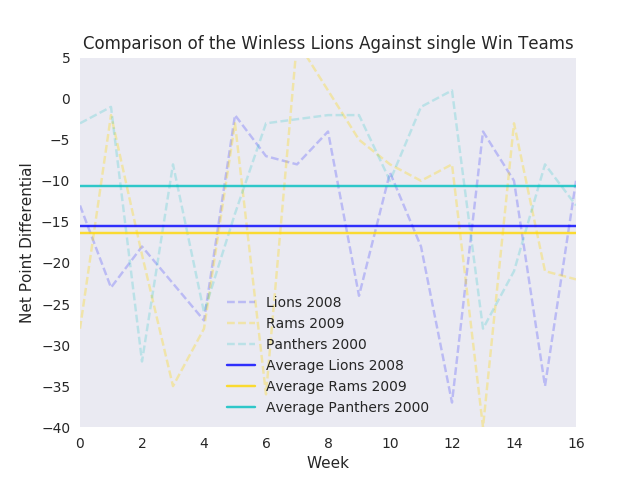

In [49]:
plt.figure()
#plt.subplot(axisbg='lavenderblush', alpha=0.9)
plt.plot(lions08df['NetPoints'], label="Lions 2008", alpha=0.2, color='b', ls='--')
plt.plot(Rams09df['NetPoints'], label="Rams 2009", alpha=0.3, color='gold', ls='--')
plt.plot(Carg00df['NetPoints'], label="Panthers 2000", alpha=0.2, color='c', ls='--')
plt.plot(lions08df['Average'], label="Average Lions 2008", color='b', alpha=0.8)
plt.plot(Rams09df['Average'], label="Average Rams 2009", color='gold', alpha=0.8)
plt.plot(Carg00df['Average'], label="Average Panthers 2000", color='c', alpha=0.8)
plt.legend()
plt.xlim((0,16))
plt.ylim((-40,5))
plt.xlabel('Week')
plt.ylabel('Net Point Differential')
plt.title('Comparison of the Winless Lions Against single Win Teams')
plt.grid(b=False)